In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [4]:
log_data=pd.read_csv('../Datas/log1.csv',header=None)

In [5]:
log_data

,0,1,2,3
0,busanmovie5,1591524325900,2445509700,...
1,busanmovie1,1591524329458,58600800,...
2,busanmovie6,1591524329683,54576500,...
3,busanmovie1,1591524329894,47667400,...
4,tourguide1,1591524330100,53428500,...
...,...,...,...,...
2828,nationalparkstatus,1591524811658,28219600,...
2829,roadkillstatus,1591524811830,28280000,...
2830,tourguide,1591524811993,49620900,...
2831,endangeredanimals1,1591524812193,25620100,...


In [6]:
log_data.columns=['Dataset','Query Time','Execution Time','ManagerId']

In [7]:
log_data.info

<bound method DataFrame.info of                  Dataset     Query Time  Execution Time ManagerId
0            busanmovie5  1591524325900      2445509700       ...
1            busanmovie1  1591524329458        58600800       ...
2            busanmovie6  1591524329683        54576500       ...
3            busanmovie1  1591524329894        47667400       ...
4             tourguide1  1591524330100        53428500       ...
...                  ...            ...             ...       ...
2828  nationalparkstatus  1591524811658        28219600       ...
2829      roadkillstatus  1591524811830        28280000       ...
2830           tourguide  1591524811993        49620900       ...
2831  endangeredanimals1  1591524812193        25620100       ...
2832          tourguide1  1591524812371        43877400       ...

[2833 rows x 4 columns]>

In [8]:
log_data.describe()

,Query Time,Execution Time
count,2.833000e+03,2.833000e+03
mean,1.591525e+12,3.077180e+07
std,1.377986e+05,4.820137e+07
min,1.591524e+12,1.826380e+07
25%,1.591524e+12,2.528870e+07
50%,1.591525e+12,2.642720e+07
75%,1.591525e+12,2.856920e+07
max,1.591525e+12,2.445510e+09


In [77]:
X=log_data[['Dataset','Query Time','Execution Time']]

In [78]:
X

,Dataset,Query Time,Execution Time
0,busanmovie5,1591524325900,2445509700
1,busanmovie1,1591524329458,58600800
2,busanmovie6,1591524329683,54576500
3,busanmovie1,1591524329894,47667400
4,tourguide1,1591524330100,53428500
...,...,...,...
2828,nationalparkstatus,1591524811658,28219600
2829,roadkillstatus,1591524811830,28280000
2830,tourguide,1591524811993,49620900
2831,endangeredanimals1,1591524812193,25620100


In [79]:
X.describe()

,Query Time,Execution Time
count,2.833000e+03,2.833000e+03
mean,1.591525e+12,3.077180e+07
std,1.377986e+05,4.820137e+07
min,1.591524e+12,1.826380e+07
25%,1.591524e+12,2.528870e+07
50%,1.591525e+12,2.642720e+07
75%,1.591525e+12,2.856920e+07
max,1.591525e+12,2.445510e+09


In [80]:
execute_mean=X[['Execution Time']].mean()
execute_std=X[['Execution Time']].std()
X[['Execution Time']]=(X[['Execution Time']]-execute_mean)/execute_std * 10

C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [81]:
query_min=X[['Query Time']].min()
X[['Query Time']]=(X[['Query Time']]-query_min)

In [82]:
outliar_removed_index=X[X[['Execution Time']]<2]['Execution Time'].dropna().index
X=X.iloc[outliar_removed_index]

In [83]:
Dataset_Query=X.groupby('Dataset')['Query Time'].sum().to_frame().reset_index()

In [84]:
Dataset_Execution=X.groupby('Dataset')['Execution Time'].mean().to_frame().reset_index()

In [85]:
Dataset_Query_Frequency=X.groupby('Dataset')['Query Time'].count().to_frame().reset_index()
Dataset_Query_Frequency.rename(columns = {'Query Time' : 'Query Count'}, inplace = True)

In [86]:
X=pd.merge(Dataset_Query,Dataset_Execution,on='Dataset')
X=pd.merge(X,Dataset_Query_Frequency,on='Dataset')

In [87]:
count_mean=X[['Query Count']].mean()
count_std=X[['Query Count']].std()
X[['Query Count']]=(X[['Query Count']]-count_mean)/count_std *10

In [88]:
query_mean=X[['Query Time']].mean()
query_std=X[['Query Time']].std()
X[['Query Time']]=(X[['Query Time']]-query_mean) / query_std

In [89]:
X

,Dataset,Query Time,Execution Time,Query Count
0,busanmovie1,0.674722,-0.857548,8.477071
1,busanmovie2,-1.065483,-0.739944,-5.128105
2,busanmovie3,-1.728874,-0.825591,-15.105234
3,busanmovie4,-1.196107,-0.604405,-10.570175
4,busanmovie5,-0.209938,-0.825927,-0.593046
5,busanmovie6,0.051797,-0.796543,-1.953564
6,endangeredanimals,-0.901212,-1.012544,-11.023681
7,endangeredanimals1,-0.433569,-0.917315,-0.593046
8,koreanhistory,1.408911,-0.286632,15.279659
9,koreanhistory1,-0.368807,-0.177881,-5.128105


In [90]:
hot_index=X[X[['Query Time']]>X[['Query Time']].mean()]['Query Time'].dropna().index

In [91]:
hot_index

Int64Index([0, 5, 8, 11, 12, 13, 14, 17, 19, 20, 21, 23, 25], dtype='int64')

In [92]:
hot_index=X[X[['Execution Time']]>X[['Execution Time']].mean()]['Execution Time'].dropna().index

In [93]:
hot_index

Int64Index([1, 3, 8, 9, 10, 22, 23, 24, 25], dtype='int64')

In [94]:
hot_index=X[X[['Query Count']]>X[['Query Count']].mean()]['Query Count'].dropna().index

In [95]:
hot_index

Int64Index([0, 8, 11, 12, 13, 17, 19, 20], dtype='int64')

In [96]:
Y=pd.DataFrame(np.zeros(26))

In [97]:
hots=[0,8,11,17,19,20]

In [98]:
Y.loc[hots]=1.0

In [99]:
Y

,0
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,1.0
9,0.0


In [100]:
X=X[["Query Time","Execution Time","Query Count"]]

In [101]:
X

,Query Time,Execution Time,Query Count
0,0.674722,-0.857548,8.477071
1,-1.065483,-0.739944,-5.128105
2,-1.728874,-0.825591,-15.105234
3,-1.196107,-0.604405,-10.570175
4,-0.209938,-0.825927,-0.593046
5,0.051797,-0.796543,-1.953564
6,-0.901212,-1.012544,-11.023681
7,-0.433569,-0.917315,-0.593046
8,1.408911,-0.286632,15.279659
9,-0.368807,-0.177881,-5.128105


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [107]:
tree=DecisionTreeClassifier()
model=tree.fit(X_train,y_train)

In [109]:
X_test

,Query Time,Execution Time,Query Count
8,1.408911,-0.286632,15.279659
16,-0.057089,-1.031587,-1.046552
0,0.674722,-0.857548,8.477071
24,-1.644317,-0.305742,-15.105234
11,0.287335,-0.821214,2.127989
9,-0.368807,-0.177881,-5.128105
13,2.686636,-1.032205,29.791847
1,-1.065483,-0.739944,-5.128105
23,0.086057,-0.617147,-0.139540


In [108]:
model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 1., 0., 0.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BC338BCE08>]],
      dtype=object)

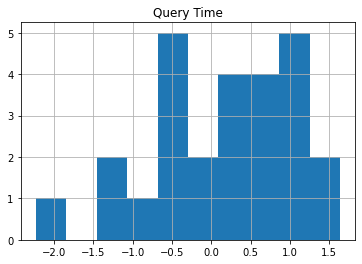

In [172]:
X[['Query Time']].hist()

In [244]:
hot_execution_index=X[X[['Execution Time']]>X[['Execution Time']].mean()]['Execution Time'].dropna().index

In [245]:
hot_execution_index

Int64Index([1, 3, 8, 9, 10, 22, 23, 24, 25], dtype='int64')

In [246]:
hot_query_index=X[X[['Query Time']]>X[['Query Time']].mean()]['Query Time'].dropna().index

In [247]:
hot_query_index

Int64Index([5, 6, 9, 10, 11, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25], dtype='int64')

In [248]:
hot_count_index=X[X[['Query Count']]>X[['Query Count']].mean()]['Query Count'].dropna().index

In [249]:
hot_count_index

Int64Index([0, 8, 11, 12, 13, 17, 19, 20], dtype='int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BC33D0B5C8>]],
      dtype=object)

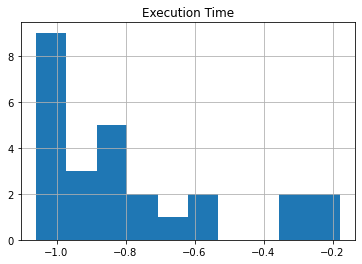

In [173]:
X[['Execution Time']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BC33E4F508>]],
      dtype=object)

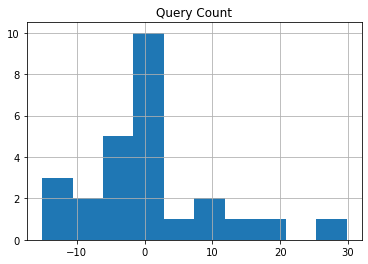

In [243]:
X[['Query Count']].hist()

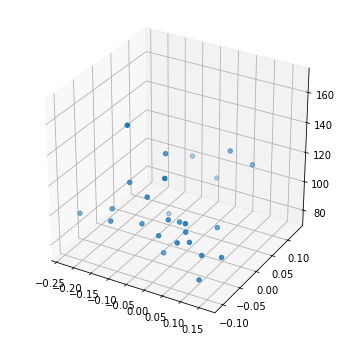

In [109]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[["Query Time"]],X[["Execution Time"]],X[["Query Count"]])
plt.show()

In [115]:
km=KMeans(n_clusters=2,n_jobs=4)
km.fit(X[['Query Time','Execution Time','Query Count']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [116]:
centers=km.cluster_centers_
centers

array([[ 0.01119251, -0.04384995, -0.43555073],
       [-0.01784885, -0.05543046,  1.45183576]])

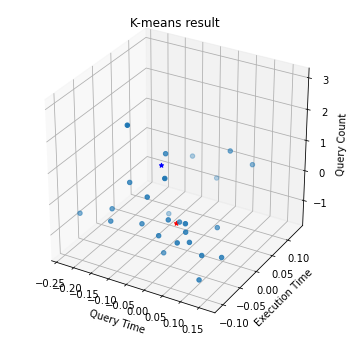

In [117]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[["Query Time"]],X[["Execution Time"]],X[["Query Count"]])
ax.scatter(centers[0][0],centers[0][1],centers[0][2],marker='*',c='red')
ax.scatter(centers[1][0],centers[1][1],centers[1][2],marker='*',c='blue')
ax.set_xlabel("Query Time");
ax.set_ylabel("Execution Time");
ax.set_zlabel("Query Count");
ax.set_title("K-means result");
plt.show()